# Using ML to see if there is a correlation between the number of points in regards to the lenggth of description

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plot / Graph stuffs
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

from subprocess import check_output
print(check_output(["ls", "Resources"]).decode("utf8"))

wine.csv
wine_clean.csv



In [2]:
# Read data
init_data = pd.read_csv("Resources/wine.csv")
print("Length of dataframe :", len(init_data))
init_data.head()

Length of dataframe : 150930


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
# Clean data by removing all Nulls and NaN's
parsed_data = init_data[init_data.duplicated('description', keep=False)]
print("Length of dataframe after duplicates are removed:", len(parsed_data))

parsed_data.dropna(subset=['description', 'points'])
print("Length of dataframe after NaNs are removed:", len(parsed_data))

parsed_data.head()

Length of dataframe after duplicates are removed: 92393
Length of dataframe after NaNs are removed: 92393


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
29,29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
60,60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,NaN,Malbec,Matias Riccitelli
61,61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.0,Victoria,Mornington Peninsula,NaN,Pinot Noir,Moorooduc
62,62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,NaN,Malbec,Navarro Correas


In [4]:
# Review data for "description" vs "points"
dp = parsed_data[['description','points']]
dp.info()
dp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92393 entries, 25 to 150929
Data columns (total 2 columns):
description    92393 non-null object
points         92393 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


,description,points
25,"Yields were down in 2015, but intensity is up,...",94
29,This standout Rocks District wine brings earth...,94
60,"Concentrated, ripe blackberry and cassis aroma...",91
61,Moorooduc's estate Pinot Noir is a solid value...,91
62,Smoky aromas of fresh-cut wood blend with berr...,91


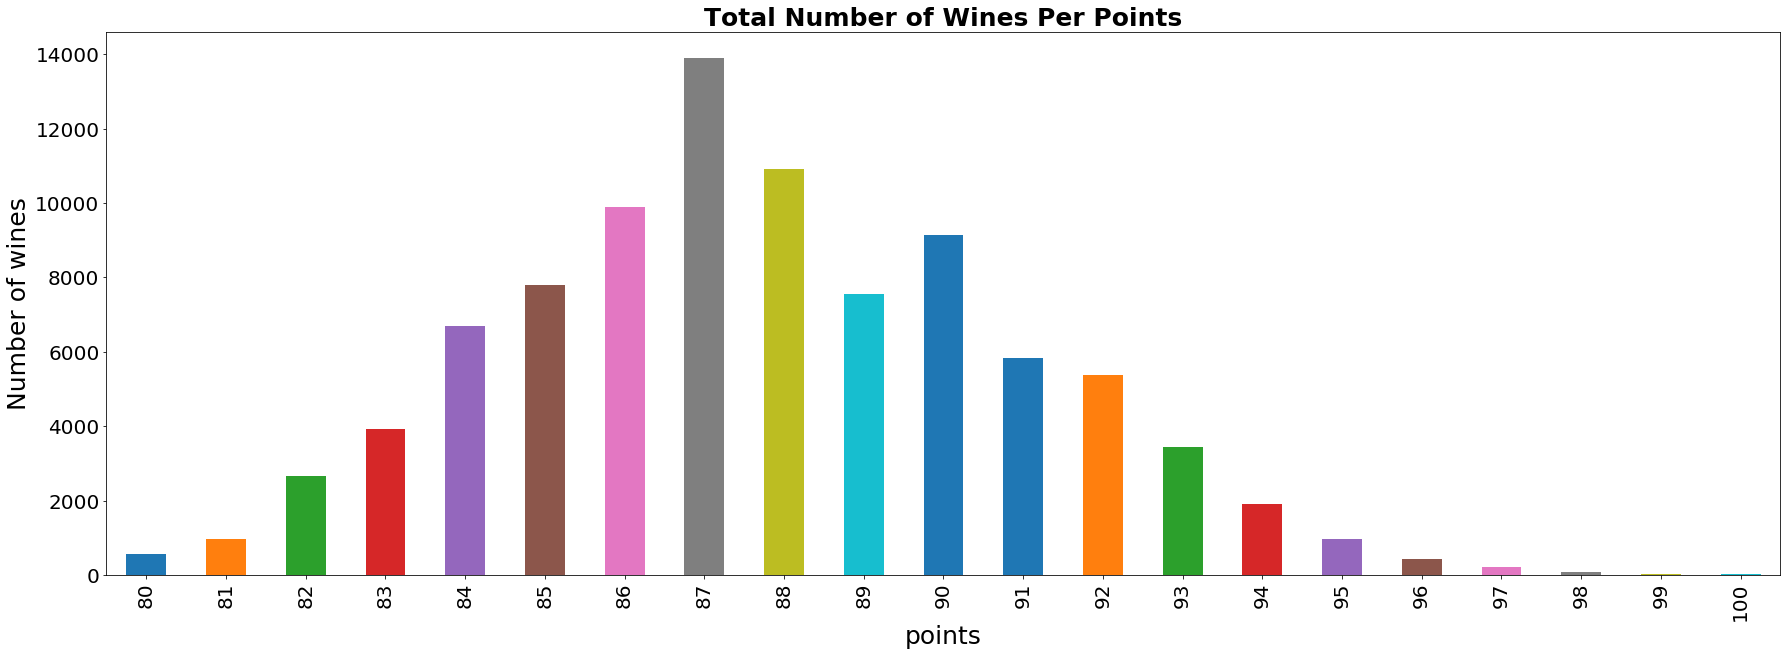

In [5]:
# Wines per Points BAR CHART
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Total Number of Wines Per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
dp.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

In [6]:
# Find the length of the description(per word count) 
dp = dp.assign(description_length = dp['description'].apply(len))
dp.info()
dp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92393 entries, 25 to 150929
Data columns (total 3 columns):
description           92393 non-null object
points                92393 non-null int64
description_length    92393 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


,description,points,description_length
25,"Yields were down in 2015, but intensity is up,...",94,215
29,This standout Rocks District wine brings earth...,94,333
60,"Concentrated, ripe blackberry and cassis aroma...",91,242
61,Moorooduc's estate Pinot Noir is a solid value...,91,315
62,Smoky aromas of fresh-cut wood blend with berr...,91,229


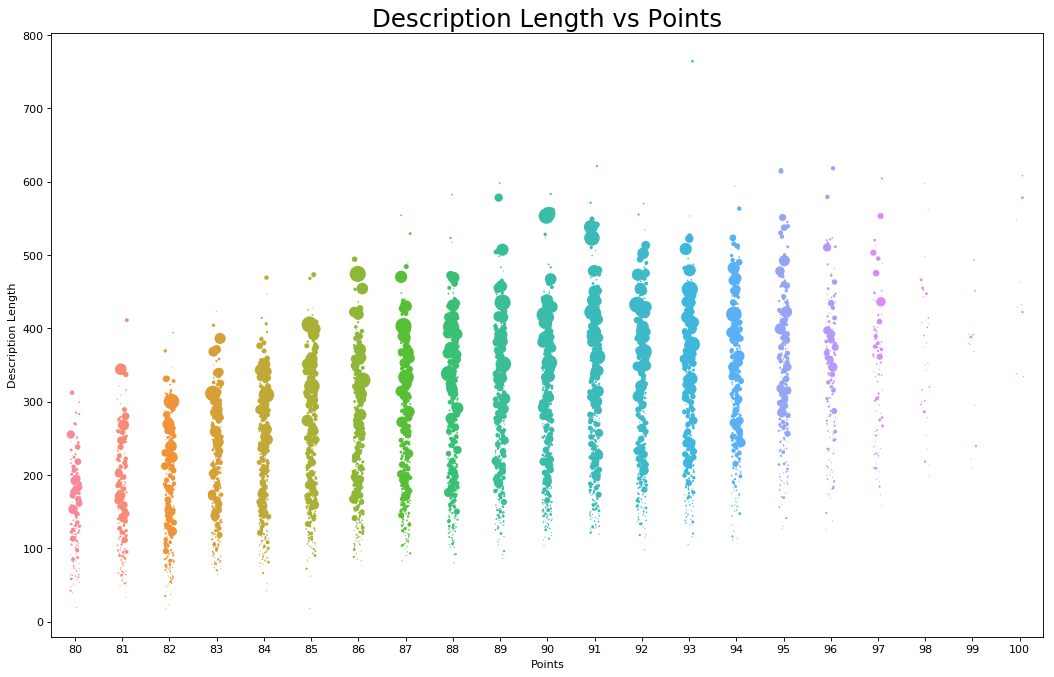

In [10]:
# Import Data
df_counts = dp.groupby(['description_length', 'points']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.points, df_counts.description_length, size=df_counts.counts*0.50, ax=ax)
ax.set_ylabel('Description Length') # Y label
ax.set_xlabel('Points') # X label

# Decorations
plt.title('Description Length vs Points', fontsize=22)
plt.show()

## Simplifying Data
source :winespectator.com

Wine Spectator's 100-Point Scale

Wine Spectator tasters review wines on the following 100-point scale:

95-100 Classic: a great wine  
90-94 Outstanding: a wine of superior character and style
85-89 Very good: a wine with special qualities  
80-84 Good: a solid, well-made wine  
75-79 Mediocre: a drinkable wine that may have minor flaws  
50-74 Not recommended  

In [12]:
#Transform method taking points as parameter
def transform_points_simplified(points):
    if points <= 80:
        return 1
    elif points >= 81 and points <= 84:
        return 2 
    elif points >= 85 and points <= 89:
        return 3 
    elif points >= 90 and points <= 94:
        return 4 
    else:
        return 5

#Applying transform method and assigning result to new column "points_simplified"
dp = dp.assign(points_simplified = dp['points'].apply(transform_points_simplified))
dp.head()

,description,points,description_length,points_simplified
25,"Yields were down in 2015, but intensity is up,...",94,215,4
29,This standout Rocks District wine brings earth...,94,333,4
60,"Concentrated, ripe blackberry and cassis aroma...",91,242,4
61,Moorooduc's estate Pinot Noir is a solid value...,91,315,4
62,Smoky aromas of fresh-cut wood blend with berr...,91,229,4


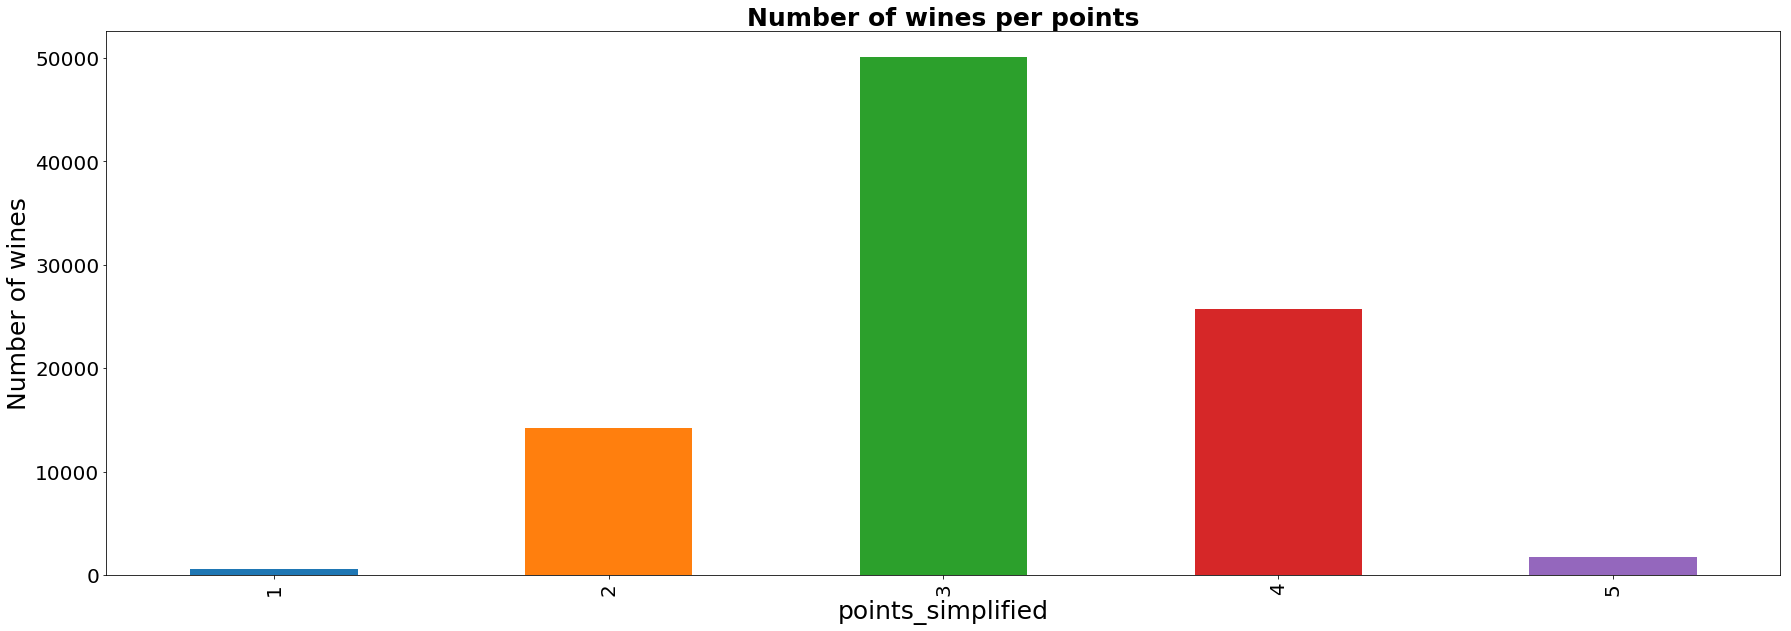

In [27]:
# Updated/Simplified Wines per Points BAR CHART
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Simplified Points', fontsize = 25) # X label
dp.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind='bar')

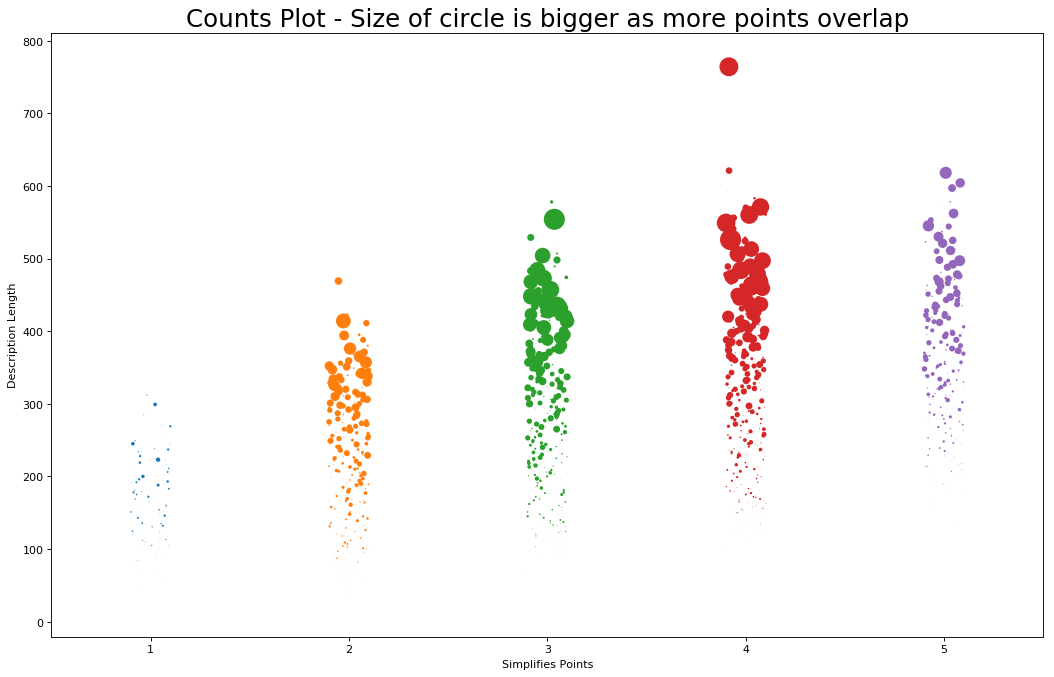

In [26]:
# Updated/Simplified Length per Points COUNTSPLOT
# Import Data
df_counts = dp.groupby(['description_length', 'points_simplified']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.points_simplified, df_counts.description_length, size=df_counts.counts*0.07, ax=ax)
ax.set_ylabel('Description Length') # Y label
ax.set_xlabel('Simplifies Points') # X label

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

# COUNT VECTORIZATION

In [30]:
# CountVectorizer output on this collection
X = dp['description']
y = dp['points_simplified']

vectorizer = CountVectorizer()
vectorizer.fit(X)

C:\Users\tinat_000\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
C:\Users\tinat_000\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [31]:
# Vectorized X based on the trained data
X = vectorizer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (92393, 21400)
Amount of Non-Zero occurrences:  3172240
Density: 0.1604402000353832


### Training data and test data
 80% of the dataset will be used for training. 20% of the dataset will be used for testing.

In [33]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

C:\Users\tinat_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.98      0.88      0.93       107
           2       0.97      0.90      0.93      2816
           3       0.93      0.98      0.95     10129
           4       0.98      0.90      0.94      5059
           5       1.00      0.87      0.93       368

   micro avg       0.95      0.95      0.95     18479
   macro avg       0.97      0.91      0.94     18479
weighted avg       0.95      0.95      0.95     18479



# TFIDF VECTORIZATION

In [36]:
# TfidfVectorizer output on this collection
X = dp['description']
y = dp['points_simplified']

# Vectorizing model
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

C:\Users\tinat_000\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
C:\Users\tinat_000\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


### Training data and test data
 80% of the dataset will be used for training. 20% of the dataset will be used for testing.

In [37]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

C:\Users\tinat_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.98      0.89      0.93       107
           2       0.97      0.89      0.93      2816
           3       0.93      0.98      0.95     10129
           4       0.97      0.91      0.94      5059
           5       1.00      0.87      0.93       368

   micro avg       0.94      0.94      0.94     18479
   macro avg       0.97      0.91      0.94     18479
weighted avg       0.95      0.94      0.94     18479

